In [ ]:
pip install Pillow

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.offsetbox import AnnotationBbox, TextArea, HPacker, VPacker
from PIL import Image
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LECTURA FICHERO Y MODIFICACIÓN DEL DATA SET

In [4]:
df= pd.read_csv("/content/drive/MyDrive/CURSO PYTHON/PFM/Clubes.csv",encoding= "UTF-8" , sep=";")

In [5]:
df

,Nombre club,CIUDAD,BARRIO,DISTRITO,CP,NºSOCIOS,NºCLIENTES,POBLACION,MEDIA ALTAS,% DE CLIENTES,...,Canon/entrenador,Horas entrenadores MES,Coste laboral/hora,Coste club,Pruebas mes,Altas,LATITUD,LONGITUD,Unnamed: 25,Unnamed: 26
0,BFGM,ALCOBENDAS,Ayuntamiento,CENTRO,28100.0,"1359,00","7,00","45769,00","59,00","0,52%",...,"400,00","80,00","7,44","407,44","3,30","0,70","40,54819794","-3,639929331",NaN,","
1,BFSL,ALCOBENDAS,Casco Antiguo,CENTRO,28108.0,"1757,00","8,00","45769,00","92,00","0,46%",...,"450,00","140,00","7,44","464,88","9,20","1,30","40,53814071","-3,634684204",NaN,NaN
2,BFLI (ALC),ALICANTE,Divina Pastora,NaN,3009.0,"2250,00","8,00","1467,00","249,00","0,36%",...,"200,00","140,00","7,44","214,88","5,20","0,20","38,37534391","-0,506918235",NaN,NaN
3,BFPA (ALC),ALICANTE,San Blas Santo Domingo,NaN,3005.0,"2028,00","19,00","8978,00","225,00","0,94%",...,"200,00","140,00","7,44","214,88","4,70","0,50","38,34949575","-0,502580273",NaN,NaN
4,BFLF (CT),CARTAGENA,San Antonio Abad,Ciudad Jardín,30205.0,"1493,00","2,00","45046,00","133,00","0,13%",...,"400,00","60,00","7,44","407,44","3,30","0,30","37,60683177","-0,983894889",NaN,NaN
5,BFAV (CT),CARTAGENA,Cartagena Casco,Ciudad Jardín,30201.0,"1702,00","13,00","45046,00","122,00","0,76%",...,"400,00","80,00","7,44","407,44","1,50","0,20","37,61609278","-0,995410213",NaN,NaN
6,BFCO,COSLADA,NaN,NaN,28823.0,"2257,00","25,00","81860,00","100,00","1,11%",...,"450,00","180,00","7,44","464,88","5,50","1,30","40,43331468","-3,532644841",NaN,NaN
7,BFJO (ELX),ELCHE,Garbinet,NaN,3015.0,"1841,00","1,00","9383,00","132,00","0,05%",...,"400,00","60,00","7,44","407,44","5,80","0,20","38,2693029","-0,711574513",NaN,NaN
8,BFCR (ELX),ELCHE,Carrús,Distrito 4,3205.0,"1885,00","5,00","9383,00","138,00","0,27%",...,"400,00","60,00","7,44","407,44","6,50","0,20","38,2747678","-0,717602862",NaN,NaN
9,BFAA (ELX),ELCHE,La Lonja,Distrito 2,3202.0,"1783,00","14,00","9967,00","144,00","0,79%",...,"200,00","120,00","7,44","214,88","2,00","0,80","38,27217394","-0,672284404",NaN,NaN


In [6]:
df.shape

(54, 27)

In [7]:
df.columns

Index(['Nombre club', 'CIUDAD', 'BARRIO', 'DISTRITO', 'CP', 'NºSOCIOS',
       'NºCLIENTES', 'POBLACION', 'MEDIA ALTAS', '% DE CLIENTES',
       'RENTA MEDIA PERSONA', 'Nºentrenadores', 'DENSIDAD ', 'Facturacion',
       'Ticket Medio', 'AÑO CLUB', 'CANON CLUB', 'Canon/entrenador',
       'Horas entrenadores MES', 'Coste laboral/hora', 'Coste club',
       'Pruebas mes', 'Altas', 'LATITUD', 'LONGITUD', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [8]:
#Borramos las columnas vacías y no necesarias.

df=df.drop(columns=['Unnamed: 25',
       'Unnamed: 26', 'BARRIO', 'DISTRITO', 'CP','Coste club'])

In [9]:
df.head()

,Nombre club,CIUDAD,NºSOCIOS,NºCLIENTES,POBLACION,MEDIA ALTAS,% DE CLIENTES,RENTA MEDIA PERSONA,Nºentrenadores,DENSIDAD,...,Ticket Medio,AÑO CLUB,CANON CLUB,Canon/entrenador,Horas entrenadores MES,Coste laboral/hora,Pruebas mes,Altas,LATITUD,LONGITUD
0,BFGM,ALCOBENDAS,"1359,00","7,00","45769,00","59,00","0,52%","12443,00","1,00","2,656",...,"304,29",2018.0,"400,00","400,00","80,00","7,44","3,30","0,70","40,54819794","-3,639929331"
1,BFSL,ALCOBENDAS,"1757,00","8,00","45769,00","92,00","0,46%","10603,00","2,00","2,656",...,"381,25",2024.0,"900,00","450,00","140,00","7,44","9,20","1,30","40,53814071","-3,634684204"
2,BFLI (ALC),ALICANTE,"2250,00","8,00","1467,00","249,00","0,36%","21009,00","2,00","1,742",...,"210,78",2023.0,"400,00","200,00","140,00","7,44","5,20","0,20","38,37534391","-0,506918235"
3,BFPA (ALC),ALICANTE,"2028,00","19,00","8978,00","225,00","0,94%","14578,00","2,00","1,742",...,"86,79",2023.0,"400,00","200,00","140,00","7,44","4,70","0,50","38,34949575","-0,502580273"
4,BFLF (CT),CARTAGENA,"1493,00","2,00","45046,00","133,00","0,13%","11560,00","1,00",391,...,"105,00",2023.0,"400,00","400,00","60,00","7,44","3,30","0,30","37,60683177","-0,983894889"


In [10]:
df.tail()

,Nombre club,CIUDAD,NºSOCIOS,NºCLIENTES,POBLACION,MEDIA ALTAS,% DE CLIENTES,RENTA MEDIA PERSONA,Nºentrenadores,DENSIDAD,...,Ticket Medio,AÑO CLUB,CANON CLUB,Canon/entrenador,Horas entrenadores MES,Coste laboral/hora,Pruebas mes,Altas,LATITUD,LONGITUD
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Eliminamos filas que no sirven
df=df.drop(df.index[40:])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre club             40 non-null     object 
 1   CIUDAD                  40 non-null     object 
 2   NºSOCIOS                40 non-null     object 
 3   NºCLIENTES              40 non-null     object 
 4   POBLACION               40 non-null     object 
 5   MEDIA ALTAS             40 non-null     object 
 6   % DE CLIENTES           40 non-null     object 
 7   RENTA MEDIA PERSONA     40 non-null     object 
 8   Nºentrenadores          40 non-null     object 
 9   DENSIDAD                40 non-null     object 
 10  Facturacion             40 non-null     object 
 11  Ticket Medio            40 non-null     object 
 12  AÑO CLUB                40 non-null     float64
 13  CANON CLUB              40 non-null     object 
 14  Canon/entrenador        40 non-null     obje

In [13]:
df.tail()

,Nombre club,CIUDAD,NºSOCIOS,NºCLIENTES,POBLACION,MEDIA ALTAS,% DE CLIENTES,RENTA MEDIA PERSONA,Nºentrenadores,DENSIDAD,...,Ticket Medio,AÑO CLUB,CANON CLUB,Canon/entrenador,Horas entrenadores MES,Coste laboral/hora,Pruebas mes,Altas,LATITUD,LONGITUD
35,BFMR,VALENCIA,"1640,00","9,00","12448,00","82,00","0,55%","14432,00","1,00",5.772,...,"150,33",2020.0,"400,00","400,00","20,00","7,44","5,20","0,80","39,48208716","-0,400115289"
36,BFPT,VALENCIA,"1558,00","18,00","27234,00","112,00","1,16%","12293,00","2,00",5.772,...,"155,15",2022.0,"800,00","400,00","45,00","7,44","5,50","1,30","39,4749638","-0,396644319"
37,BFPM,VALENCIA,"1793,00","9,00","15317,00","126,00","0,50%","11755,00","2,00",5.772,...,"139,77",2022.0,"400,00","200,00","45,00","7,44","9,50","1,00","39,46389154","-0,346806519"
38,BFPR,VALENCIA,"1458,00","7,00","6505,00","108,00","0,48%","12797,00","2,00",5.772,...,"135,05",2022.0,"800,00","400,00","45,00","7,44","2,80","0,50","39,44925072","-0,387823364"
39,BFAN,VALENCIA,"1646,00","7,00","43278,00","150,00","0,43%","13377,00","2,00",5.772,...,"143,68",2023.0,"400,00","200,00","45,00","7,44","6,80","1,00","39,47526832","-0,413748862"


In [14]:
df.shape

(40, 21)

In [15]:
# CAMBIAR NOMBRE COLUMNAS
df.rename(columns={'MEDIA ALTAS': 'M/ALTAS',
                  '% DE CLIENTES': '%CLIENTES',
                  'RENTA MEDIA PERSONA': 'RM/PERSONA',
                  'Ticket Medio': 'Ticket',
                  'AÑO CLUB':'Fundacion',
                  'CANON CLUB':'CANON',
                  'Horas entrenadores MES':'Horas/entrenadores/MES',
                  'Coste laboral/hora':'Coste/laboral/hora',
                  'Pruebas mes':'Pruebas',
                  'Nombre club':'Club',
                  'NºSOCIOS':'Socios',
                  'NºCLIENTES':'Clientes',
                  'Nºentrenadores': 'Entrenadores',
                  'DENSIDAD ':'DENSIDAD'},
          inplace = True)

In [16]:
df.columns

Index(['Club', 'CIUDAD', 'Socios', 'Clientes', 'POBLACION', 'M/ALTAS',
       '%CLIENTES', 'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
       'Ticket', 'Fundacion', 'CANON', 'Canon/entrenador',
       'Horas/entrenadores/MES', 'Coste/laboral/hora', 'Pruebas', 'Altas',
       'LATITUD', 'LONGITUD'],
      dtype='object')

In [17]:
df.columns

Index(['Club', 'CIUDAD', 'Socios', 'Clientes', 'POBLACION', 'M/ALTAS',
       '%CLIENTES', 'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
       'Ticket', 'Fundacion', 'CANON', 'Canon/entrenador',
       'Horas/entrenadores/MES', 'Coste/laboral/hora', 'Pruebas', 'Altas',
       'LATITUD', 'LONGITUD'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Club                    40 non-null     object 
 1   CIUDAD                  40 non-null     object 
 2   Socios                  40 non-null     object 
 3   Clientes                40 non-null     object 
 4   POBLACION               40 non-null     object 
 5   M/ALTAS                 40 non-null     object 
 6   %CLIENTES               40 non-null     object 
 7   RM/PERSONA              40 non-null     object 
 8   Entrenadores            40 non-null     object 
 9   DENSIDAD                40 non-null     object 
 10  Facturacion             40 non-null     object 
 11  Ticket                  40 non-null     object 
 12  Fundacion               40 non-null     float64
 13  CANON                   40 non-null     object 
 14  Canon/entrenador        40 non-null     obje

In [19]:
# Selecciono las columnas a cambiar formato
cols= [ 'Socios', 'Clientes', 'POBLACION', 'M/ALTAS','DENSIDAD',
       'RM/PERSONA', 'Entrenadores', 'Facturacion', 'Ticket',
       'Fundacion', 'CANON', 'Canon/entrenador', 'Horas/entrenadores/MES',
       'Coste/laboral/hora', 'Pruebas', 'Altas', 'LATITUD', 'LONGITUD']

In [20]:
def convert_to_float(value):
    try:
        # Reemplazar comas por puntos y convertir a float
        return float(value.replace(',', '.'))
    except AttributeError:
        return value  # Manejar casos donde el valor ya es de tipo float

In [21]:
for col in cols:
    df[col] = df[col].apply(convert_to_float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Club                    40 non-null     object 
 1   CIUDAD                  40 non-null     object 
 2   Socios                  40 non-null     float64
 3   Clientes                40 non-null     float64
 4   POBLACION               40 non-null     float64
 5   M/ALTAS                 40 non-null     float64
 6   %CLIENTES               40 non-null     object 
 7   RM/PERSONA              40 non-null     float64
 8   Entrenadores            40 non-null     float64
 9   DENSIDAD                40 non-null     float64
 10  Facturacion             40 non-null     float64
 11  Ticket                  40 non-null     float64
 12  Fundacion               40 non-null     float64
 13  CANON                   40 non-null     float64
 14  Canon/entrenador        40 non-null     floa

In [23]:
cols1=['%CLIENTES']

In [24]:
#CAMBIO DE COLUMNA %CLIENTES:
def clientes (x):
  try:
    return float (x.replace('%','').replace(',','.'))
  except AttributeError:
    return x


In [25]:
for col in cols1:
    df[col] = df[col].apply(clientes)

In [26]:
df.head()

,Club,CIUDAD,Socios,Clientes,POBLACION,M/ALTAS,%CLIENTES,RM/PERSONA,Entrenadores,DENSIDAD,...,Ticket,Fundacion,CANON,Canon/entrenador,Horas/entrenadores/MES,Coste/laboral/hora,Pruebas,Altas,LATITUD,LONGITUD
0,BFGM,ALCOBENDAS,1359.0,7.0,45769.0,59.0,0.52,12443.0,1.0,2.656,...,304.29,2018.0,400.0,400.0,80.0,7.44,3.3,0.7,40.548198,-3.639929
1,BFSL,ALCOBENDAS,1757.0,8.0,45769.0,92.0,0.46,10603.0,2.0,2.656,...,381.25,2024.0,900.0,450.0,140.0,7.44,9.2,1.3,40.538141,-3.634684
2,BFLI (ALC),ALICANTE,2250.0,8.0,1467.0,249.0,0.36,21009.0,2.0,1.742,...,210.78,2023.0,400.0,200.0,140.0,7.44,5.2,0.2,38.375344,-0.506918
3,BFPA (ALC),ALICANTE,2028.0,19.0,8978.0,225.0,0.94,14578.0,2.0,1.742,...,86.79,2023.0,400.0,200.0,140.0,7.44,4.7,0.5,38.349496,-0.502580
4,BFLF (CT),CARTAGENA,1493.0,2.0,45046.0,133.0,0.13,11560.0,1.0,391.000,...,105.00,2023.0,400.0,400.0,60.0,7.44,3.3,0.3,37.606832,-0.983895


2. ANÁLISIS ESTADÍSTICO / DESCRIPTIVO DE LOS DATOS

In [27]:
df.describe()

,Socios,Clientes,POBLACION,M/ALTAS,%CLIENTES,RM/PERSONA,Entrenadores,DENSIDAD,Facturacion,Ticket,Fundacion,CANON,Canon/entrenador,Horas/entrenadores/MES,Coste/laboral/hora,Pruebas,Altas,LATITUD,LONGITUD
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.00,40.000000,40.000000,40.000000,40.000000
mean,2138.100000,20.175000,27826.150000,157.075000,0.967000,16635.181750,2.00000,6456.934750,3518.639000,175.05050,2022.050000,580.000000,336.535750,156.375000,7.44,5.777500,1.262500,39.274651,-2.006165
std,849.995077,20.825142,20771.489498,56.585487,1.206011,4178.162408,1.26085,12602.711776,3828.264227,62.67625,1.767948,294.566174,188.990965,192.317138,0.00,3.097185,1.382062,1.226831,1.689694
min,860.000000,1.000000,1467.000000,59.000000,0.050000,8940.560000,1.00000,1.397000,0.000000,0.00000,2018.000000,400.000000,171.430000,20.000000,7.44,1.500000,0.000000,36.690490,-4.460700
25%,1619.500000,7.000000,9383.000000,119.500000,0.412500,13085.750000,1.00000,5.772000,994.312500,143.60500,2021.750000,400.000000,200.000000,45.000000,7.44,3.600000,0.450000,38.330814,-3.673083
50%,1803.500000,15.000000,23888.500000,147.000000,0.740000,17165.805000,2.00000,5.772000,2783.350000,172.89000,2023.000000,400.000000,350.000000,80.000000,7.44,5.500000,1.000000,39.480720,-0.989653
75%,2494.750000,25.000000,45046.000000,194.500000,1.117500,20446.250000,2.00000,7210.000000,3753.587500,199.91750,2023.000000,800.000000,400.000000,160.000000,7.44,6.550000,1.350000,40.431275,-0.391633
max,5380.000000,105.000000,81860.000000,314.000000,7.440000,24440.980000,7.00000,42157.000000,19600.580000,381.25000,2024.000000,1200.000000,1200.000000,840.000000,7.44,15.500000,7.700000,40.548198,-0.266404


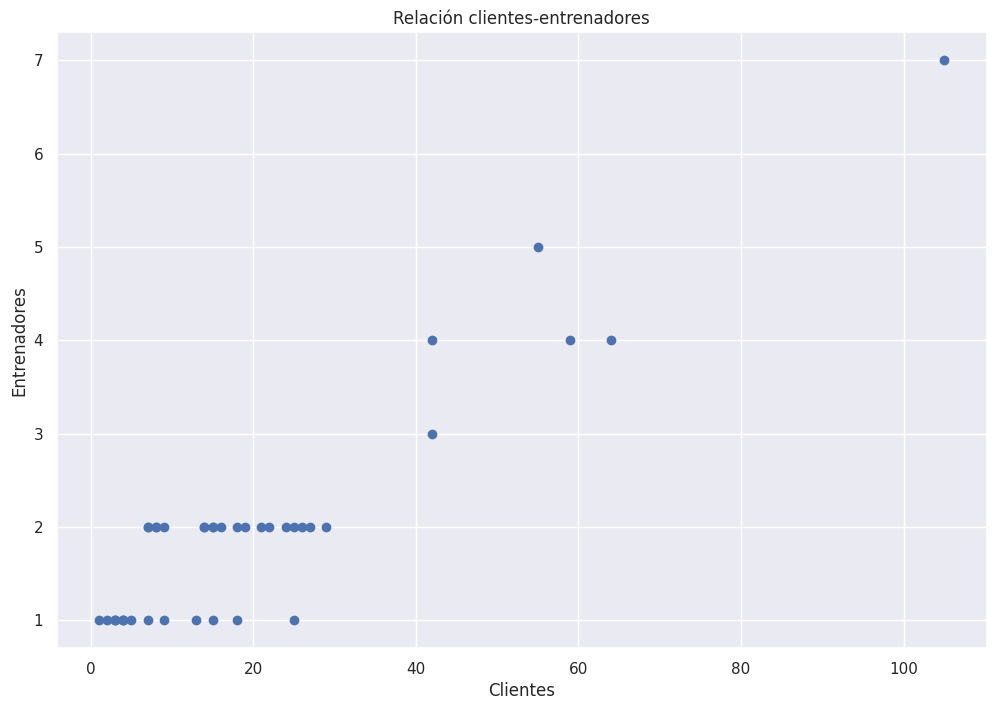

In [56]:

plt.figure(figsize=(12,8))
plt.scatter(df['Clientes'],df['Entrenadores'])
plt.title('Relación clientes-entrenadores')
plt.xlabel('Clientes')
plt.ylabel('Entrenadores')
plt.show()

In [29]:
#PASAR COLUMNA AÑO A OBJ.
df['Fundacion'] = df['Fundacion'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Club                    40 non-null     object 
 1   CIUDAD                  40 non-null     object 
 2   Socios                  40 non-null     float64
 3   Clientes                40 non-null     float64
 4   POBLACION               40 non-null     float64
 5   M/ALTAS                 40 non-null     float64
 6   %CLIENTES               40 non-null     float64
 7   RM/PERSONA              40 non-null     float64
 8   Entrenadores            40 non-null     float64
 9   DENSIDAD                40 non-null     float64
 10  Facturacion             40 non-null     float64
 11  Ticket                  40 non-null     float64
 12  Fundacion               40 non-null     object 
 13  CANON                   40 non-null     float64
 14  Canon/entrenador        40 non-null     floa

In [30]:
#Función para graficar
def bar_plot(df, x, y):

  # Ordenamos los valores
  df.sort_values(x, inplace=True)

  # Dejamos el estilo del gráfico al de seaborn
  sns.set()

  # Establecemos el tamaño del gráfico
  plt.figure(figsize=(12,8))

  # Creamos el gráfico de barras
  plt.barh(y, x, data=df)

  # Añadimos la línea vertical
  plt.axvline(df[x].mean(), ls='--', c='r')

  plt.show()

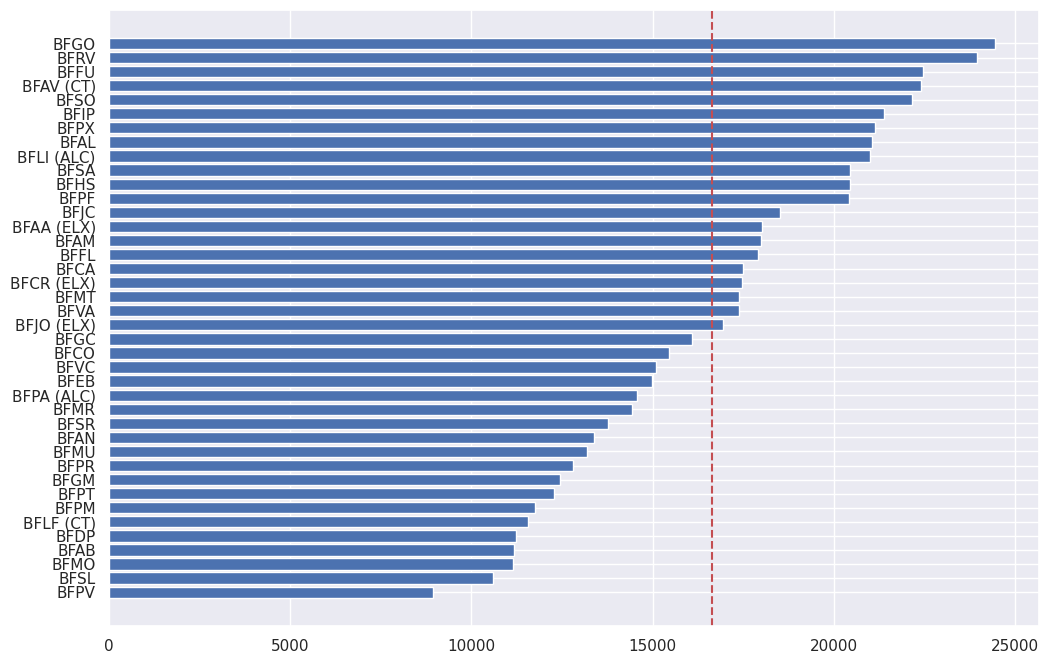

In [58]:
bar_plot(df,'RM/PERSONA','Club')

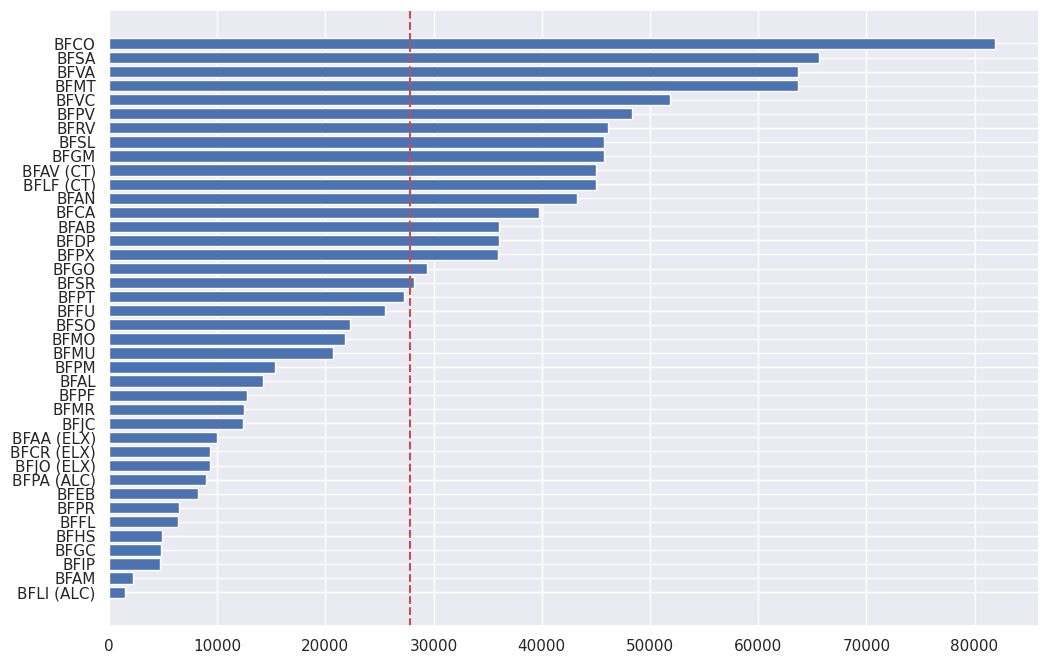

In [59]:
bar_plot(df,'POBLACION','Club')

In [33]:
#Función para hacer scatter
def scatter_plot(df, x, y, text=None, color=None):

  # Creamos el scatter plot con plotly
  fig =px.scatter(df, x, y, text=text, color=color, width=800, height=500)

  # Añadimos la línea horizontal
  fig.add_shape(type='line',
                x0 = df[x].mean(),
                y0 = df[y].min(),
                y1 = df[y].max(),
                x1 = df[x].mean())

  # Añadimos la línea vertical
  fig.add_shape(type='line',
                x0 = df[x].min(),
                y0 = df[y].mean(),
                y1 = df[y].mean(),
                x1 = df[x].max())

  # Especificamos dónde irán los nombres de los valores
  fig.update_traces(textposition='top center')
  fig.show()

In [66]:
scatter_plot(df,'Pruebas','Altas','Club')

In [35]:
#Gráfico 3D
def scatter_plot3D(df, x, y, z, text=None, color=None):

  # Crear el gráfico 3D
  fig = px.scatter_3d(df, x, y, z, color=color, text=text)

  # Establecer un tamaño del gráfico
  fig.update_layout(autosize=False,
                    width=800,
                    height=800)

  fig.show()

In [62]:
scatter_plot3D(df, 'Horas/entrenadores/MES', 'Entrenadores', 'Altas', text='Club')

In [37]:
#COMBINACIÓN DE ALGO CON EL AÑO DE FUNDACIÓN.
scatter_plot(df,'Altas','Entrenadores','Club')

In [38]:
# Análisis general con estadísticas
df['Ticket'].describe()

count     40.00000
mean     175.05050
std       62.67625
min        0.00000
25%      143.60500
50%      172.89000
75%      199.91750
max      381.25000
Name: Ticket, dtype: float64

In [39]:
# Distribución de clubes por niveles según entrenadores.
for i in range(len(df)):

  if df.Entrenadores.values[i] <= 2:
    df.loc[i,'Club_Entrenador'] = 'Pequeño'

  elif (df.Entrenadores.values[i]  >= 3) & (df.Entrenadores.values[i]  <= 4):
     df.loc[i,'Club_Entrenador'] = 'Mediano'

  else: df.loc[i,'Club_Entrenador'] = 'Grande'

df.Club_Entrenador.value_counts()


Club_Entrenador
Pequeño    34
Mediano     4
Grande      2
Name: count, dtype: int64

3. CORRELACIONES ENTRE COLUMNAS

In [40]:
df['Fundacion'] = df['Fundacion'].astype('float')

In [41]:
df1=df.drop(columns=['Club','Club_Entrenador','LATITUD','LONGITUD','CIUDAD','Coste/laboral/hora'])
df1.head()

,Socios,Clientes,POBLACION,M/ALTAS,%CLIENTES,RM/PERSONA,Entrenadores,DENSIDAD,Facturacion,Ticket,Fundacion,CANON,Canon/entrenador,Horas/entrenadores/MES,Pruebas,Altas
7,1841.0,1.0,9383.0,132.0,0.05,16954.0,1.0,730.000,0.00,0.00,2022.0,400.0,400.0,60.0,5.8,0.2
4,1493.0,2.0,45046.0,133.0,0.13,11560.0,1.0,391.000,210.00,105.00,2023.0,400.0,400.0,60.0,3.3,0.3
8,1885.0,5.0,9383.0,138.0,0.27,17456.0,1.0,730.000,465.45,93.09,2022.0,400.0,400.0,60.0,6.5,0.2
32,1753.0,4.0,6352.0,155.0,0.23,17917.0,1.0,5.772,573.50,143.38,2023.0,400.0,400.0,20.0,3.2,0.7
23,2393.0,3.0,4892.0,250.0,0.13,20443.0,1.0,1.486,600.00,200.00,2023.0,400.0,400.0,80.0,6.0,0.2


In [42]:
df1.corr()

,Socios,Clientes,POBLACION,M/ALTAS,%CLIENTES,RM/PERSONA,Entrenadores,DENSIDAD,Facturacion,Ticket,Fundacion,CANON,Canon/entrenador,Horas/entrenadores/MES,Pruebas,Altas
Socios,1.000000,0.526929,0.015159,0.661383,-0.051833,0.390290,0.583177,0.662055,0.532490,-0.008554,-0.167679,0.522077,-0.055065,0.649616,0.571402,0.551845
Clientes,0.526929,1.000000,0.119325,0.308120,0.706771,0.424319,0.923794,0.639986,0.982211,-0.010229,-0.392334,0.688177,-0.234433,0.902009,0.598002,0.850758
POBLACION,0.015159,0.119325,1.000000,-0.358678,0.228371,-0.138833,0.000587,0.196714,0.121513,0.232267,-0.089804,0.247229,0.326094,0.112183,-0.046503,0.043670
M/ALTAS,0.661383,0.308120,-0.358678,1.000000,-0.052610,0.431792,0.400002,0.281254,0.296615,-0.078183,0.140418,0.160078,-0.216341,0.417073,0.367985,0.284727
%CLIENTES,-0.051833,0.706771,0.228371,-0.052610,1.000000,0.203875,0.578719,0.254168,0.659067,-0.040139,-0.138706,0.390956,-0.218258,0.587380,0.106266,0.363136
RM/PERSONA,0.390290,0.424319,-0.138833,0.431792,0.203875,1.000000,0.412989,0.250606,0.418625,-0.106828,0.071382,0.095008,-0.381614,0.429626,0.157480,0.247486
Entrenadores,0.583177,0.923794,0.000587,0.400002,0.578719,0.412989,1.000000,0.554085,0.932702,0.061853,-0.253061,0.662766,-0.400596,0.932658,0.615896,0.838724
DENSIDAD,0.662055,0.639986,0.196714,0.281254,0.254168,0.250606,0.554085,1.000000,0.579980,-0.108030,-0.379228,0.635827,0.208489,0.656401,0.537786,0.559342
Facturacion,0.532490,0.982211,0.121513,0.296615,0.659067,0.418625,0.932702,0.579980,1.000000,0.121905,-0.402259,0.700854,-0.241474,0.901737,0.628686,0.879324
Ticket,-0.008554,-0.010229,0.232267,-0.078183,-0.040139,-0.106828,0.061853,-0.108030,0.121905,1.000000,0.026470,0.144554,0.042706,0.056912,0.083648,0.111882


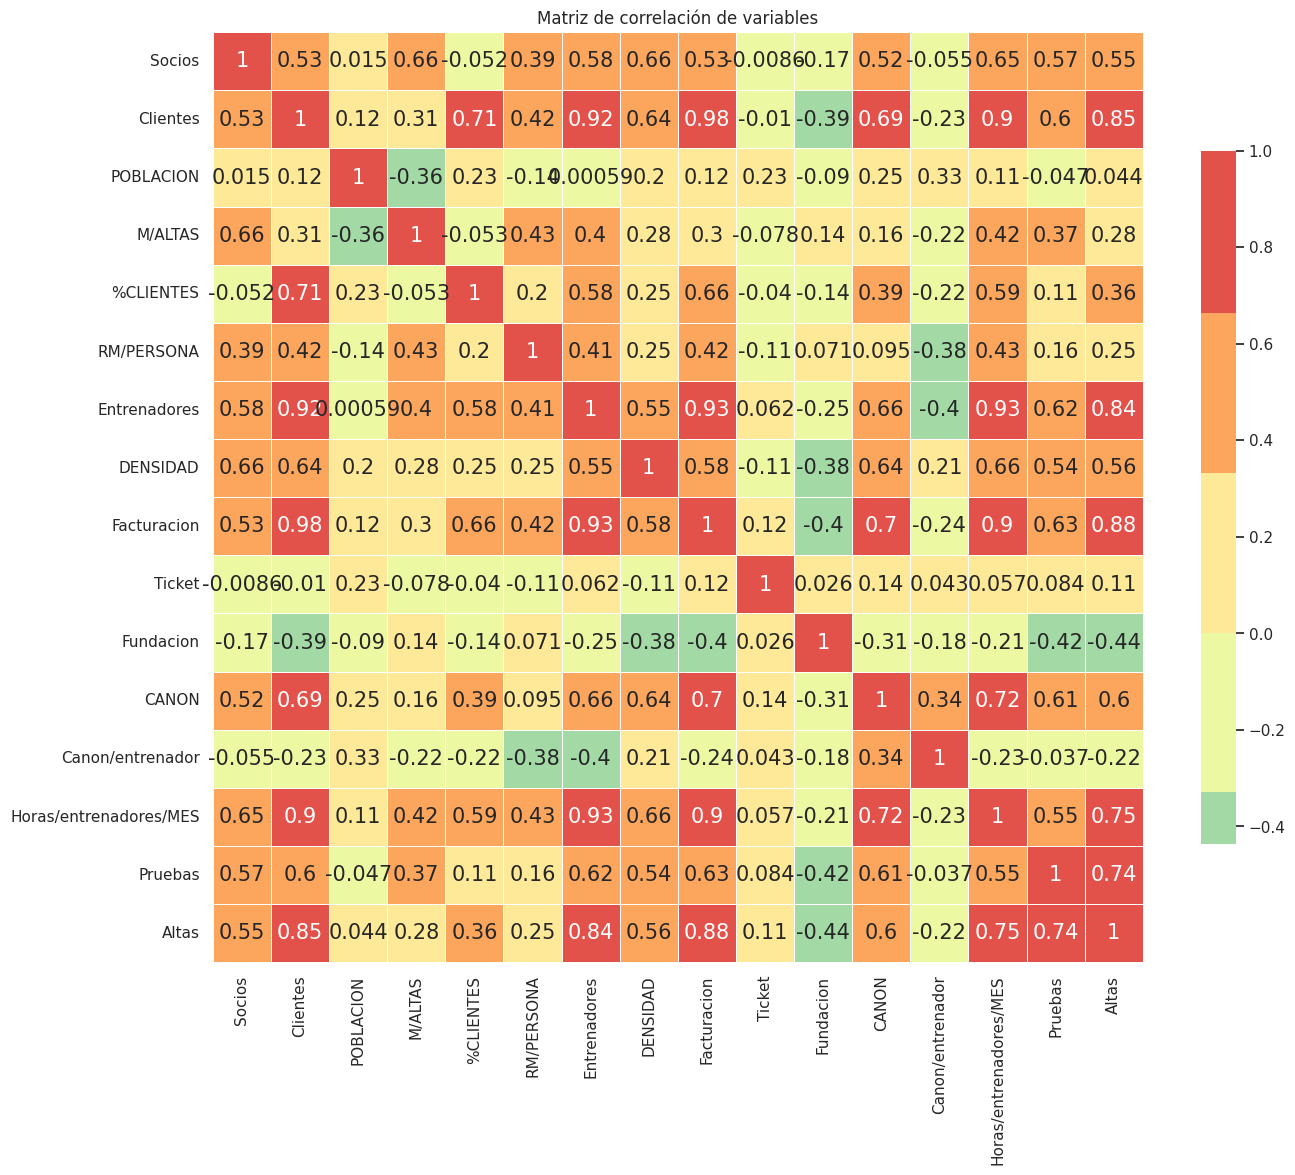

In [43]:
#Visualizaciones
df_corr = df1.corr()

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.color_palette("Spectral_r")
sns.heatmap(
    df_corr, cmap=cmap, center=0, annot=True, annot_kws={'size':15},
    square=True, linewidths=.5, cbar_kws={"shrink": .6})
ax.set_title('Matriz de correlación de variables')
plt.show()

In [44]:
df_corr.loc['Facturacion'].sort_values(ascending=False)

Facturacion               1.000000
Clientes                  0.982211
Entrenadores              0.932702
Horas/entrenadores/MES    0.901737
Altas                     0.879324
CANON                     0.700854
%CLIENTES                 0.659067
Pruebas                   0.628686
DENSIDAD                  0.579980
Socios                    0.532490
RM/PERSONA                0.418625
M/ALTAS                   0.296615
Ticket                    0.121905
POBLACION                 0.121513
Canon/entrenador         -0.241474
Fundacion                -0.402259
Name: Facturacion, dtype: float64

In [45]:
df_corr.loc['Altas'].sort_values(ascending=False)

Altas                     1.000000
Facturacion               0.879324
Clientes                  0.850758
Entrenadores              0.838724
Horas/entrenadores/MES    0.754059
Pruebas                   0.740365
CANON                     0.601490
DENSIDAD                  0.559342
Socios                    0.551845
%CLIENTES                 0.363136
M/ALTAS                   0.284727
RM/PERSONA                0.247486
Ticket                    0.111882
POBLACION                 0.043670
Canon/entrenador         -0.217739
Fundacion                -0.435761
Name: Altas, dtype: float64

In [46]:
# Radar chart con el tipo de club


In [47]:
### UTILS.PY

def get_coordinates(n):
    """
    Function for getting coordinates and rotation values for the labels.

    Args:
        n (int): number of labels.

    Returns:
        list: coordinate and rotation values.
    """

    ## calculate alpha
    alpha = 2 * np.pi/n

    ## rotation values
    alphas = alpha * np.arange(n)

    ## x-coordinate value
    coord_x = np.cos(alphas)

    ## y-coordinate value
    coord_y = np.sin(alphas)

    return np.c_[coord_x, coord_y, alphas]

def get_vertex_coord(old_value, old_min, old_max, new_min, new_max):
    """
    Function for getting coordinate for each vertex of the polygon.

    Args:
        old_value, old_min, old_max, new_min, new_max -- float values.

    Returns:
        float: the coordinate value either x or y.
    """

    ## calculate the value
    new_value = ( (old_value - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

    return new_value

def get_indices_between(range_list, coord_list, value, reverse):
    """
    Function to get the x-coordinate and y-coordinate for the polygon vertex.

    Args:
        range_list (list): range value for a particular parameter.
        coord_list (list): coordinate values where the numerical labels are placed.
        value (float): the value of the parameter.
        reverse (bool): to tell whether the range values are in reversed order or not.

    Returns:
        tuple: x-coordinate and y-coordinate value.
    """

    ## getting index value
    idx_1, idx_2 = get_index(array=range_list, value=value, reverse=reverse)

    ## get x coordinate
    x_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 0],
        new_max=coord_list[idx_2, 0]
    )

    ## get y coordinate
    y_coord = get_vertex_coord(
        old_value=value,
        old_min=range_list[idx_1],
        old_max=range_list[idx_2],
        new_min=coord_list[idx_1, 1],
        new_max=coord_list[idx_2, 1]
    )

    return x_coord, y_coord

def get_index(array, value, reverse):
    """
    Function to get the indices of two list items between which the value lies.

    Args:
        array (list): containing numerical values.
        value (float/int): value to be searched.
        reverse (bool): whether or not the range values are in reverse order.

    Returns:
        int: the two indices between which value lies.
    """

    if reverse == True:
        ## loop over the array/list
        for i in range(0, len(array) - 1):
            if array[i] >= value >= array[i+1]:
                return i, i+1

    ## loop over the array/list
    for i in range(0, len(array) - 1):
        if array[i] <= value <= array[i+1]:
            return i, i+1

def set_labels(ax, label_value, label_axis):
    """
    Function to set label for a given axis.

    Args:
        ax (axes.Axes): axis object.
        label_value (list): ticklabel values.
        label_axis (str): axis name, 'x' or 'y'

    Returns:
        list: label names
    """

    if label_axis == 'x':
        ax.set_xticks(np.arange(len(label_value)))
        axis = ax.get_xticklabels()
    else:
        ax.set_yticks(np.arange(len(label_value)) + 1)
        axis = ax.get_yticklabels()

    ## fetch labels
    labels = [items.get_text() for items in axis]

    ## init a count variable
    if label_axis == 'x':
        count = 0
    else:
        count = len(label_value) - 1

    ## iterate through all the labels and change the label name
    for i in range(len(labels)):
        labels[i] = label_value[count]

        if label_axis == 'x':
            count += 1
        else:
            count -= 1

    return labels

def add_image(image, fig, left, bottom, width=None, height=None, **kwargs):
    """
    -----> The method is taken from mplsoccer package (from github) <-----
    -----> Andy Rowlinson(@numberstorm) <-----

    Adds an image to a figure using fig.add_axes and ax.imshow

    Args:
        image (str): image path.
        fig (matplotlib.figure.Figure): figure object
        left (float): The left dimension of the new axes.
        bottom (float): The bottom dimension of the new axes.
        width (float, optional): The width of the new axes. Defaults to None.
        height (float, optional): The height of the new axes. Defaults to None.
        **kwargs: All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

    Returns:
        matplotlib.figure.Figure: figure object.
    """
    ## open image
    image = Image.open(image)

    ## height, width, channel of shape
    shape = np.array(image).shape

    image_height, image_width =  shape[0], shape[1]
    image_aspect = image_width / image_height

    figsize = fig.get_size_inches()
    fig_aspect = figsize[0] / figsize[1]

    if height is None:
        height = width / image_aspect * fig_aspect

    if width is None:
        width = height*image_aspect/fig_aspect

    ## add image
    ax_image = fig.add_axes((left, bottom, width, height))
    ax_image.axis('off')  # axis off so no labels/ ticks

    ax_image.imshow(image, **kwargs)

    return fig

def plot_text(x, y, text, text_dict, ax, color_rest='k', align="left", fontsize=None, **kwargs):
    """
    Function to plot text.

    Args:
        x (float): x-coodrinate value for text.
        y (float): y-coodrinate value for text.
        text (str): the text that will be plotted.
        text_dict (dict): contains words that the user wants to format.
        ax (axes.Axes): axis object.
        color_rest (str, optional): color for the string. Defaults to 'k'.
        align (str, optional): alignment, can have these values {'top', 'bottom', 'left', 'right', 'center', 'baseline'}. Defaults to "left".
        fontsize (float, optional): size of the font. Defaults to None.
        **kwargs(optional): All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

    Returns:
        axes.Axes: axis object
    """

    ## init an empty list and a count variable to 0
    hpacker_list = []
    count = 0

    for sentence in text.split('\n'):
        ## init an empty string and list
        temp_string = ""
        temp_hpacker = []

        for word in sentence.split(' '):
            present = text_dict.get(word)

            if present == None:
                temp_string += (word + " ")

            elif present and temp_string != "":
                if type(fontsize) == list:
                    size = fontsize[count]
                else:
                    size = fontsize

                textbox = TextArea(
                    temp_string.strip(),
                    textprops = dict(
                        color = color_rest,
                        size = size,
                        **kwargs
                    )
                )
                temp_hpacker.append(textbox)
                temp_string = ""

            if present:
                if present.get("color") == None:
                    color = color_rest
                else:
                    try:
                        color = present["color"]
                    except Exception:
                        color = present["fontcolor"]

                if present.get("ignore") == True:
                    word = word.replace('_', ' ')
                    del present["ignore"]

                if present.get("size") or present.get("fontsize"):
                    try:
                        size = present["fontsize"]
                    except Exception:
                        size = present["size"]
                elif type(fontsize) == list:
                    size = fontsize[count]
                else:
                    size = fontsize

                if present.get("ignore_last") == True:
                    w_1 = word[:-1]
                    w_2 = word[-1]
                    del present["ignore_last"]

                    textbox_1 = TextArea(
                        w_1,
                        textprops = dict(
                            present,
                            color = color,
                            size = size,
                            **kwargs
                        )
                    )

                    textbox_2 = TextArea(
                        w_2,
                        textprops = dict(
                            present,
                            color = color_rest,
                            size = size,
                            **kwargs
                        )
                    )

                    temp_box = HPacker(children=[textbox_1, textbox_2], align=align, pad=0, sep=0)
                    temp_hpacker.append(temp_box)

                else:
                    textbox = TextArea(
                        word,
                        textprops = dict(
                            present,
                            color = color,
                            size = size,
                            **kwargs
                        )
                    )
                    temp_hpacker.append(textbox)

        if len(temp_string) > 0:
            if type(fontsize) == list:
                size = fontsize[count]
            else:
                size = fontsize

            textbox = TextArea(
                temp_string.strip(),
                textprops = dict(
                    color = color_rest,
                    size = size,
                    **kwargs
                )
            )
            temp_hpacker.append(textbox)

        count += 1
        box_h = HPacker(children=temp_hpacker, align=align, pad=0, sep=4)
        hpacker_list.append(box_h)

    final_box = VPacker(children=hpacker_list, pad=0, sep=4)

    text = AnnotationBbox(final_box, (x, y), frameon=False)
    ax.add_artist(text)

    return ax

In [48]:

class Radar:
    """
    class contains methods to make radar-chart.
    """

    def __init__(
        self, background_color="#FFFFFF", patch_color="#D6D6D6", fontfamily="Liberation Serif",
        label_fontsize=10, range_fontsize=6.5, label_color="#000000", range_color="#000000"
        ):
        """
        Function to initialize the object of the class.

        Args:
            background_color (str, optional): the background color. Defaults to "#FFFFFF".
            patch_color (str, optional): the color for our circle. Defaults to "#D6D6D6".
            fontfamily (str, optional): fontfamily available in matplotlib. Defaults to "Liberation Serif".
            label_fontsize (float, optional): the fontsize of label. Defaults to 10.
            range_fontsize (float, optional): the fontsize for range values. Defaults to 6.5.
            label_color (str, optional): color value for labels. Defaults to "#000000".
            range_color (str, optional): color value for ranges. Defaults to "#000000".
        """
        self.background_color = background_color
        self.patch_color = patch_color
        self.fontfamily = fontfamily
        self.label_fontsize = label_fontsize
        self.range_fontsize = range_fontsize
        self.label_color = label_color
        self.range_color = range_color

    def plot_radar(self, ranges, params, values, radar_color, filename=None, dpi=300,
                   title=dict(), alphas=[0.6, 0.6], compare=False, endnote=None,
                   end_size=9, end_color="#95919B", image=None, image_coord=None, figax=None, **kwargs):
        """
        Function to plot radar-chart.

        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            params (list): list of string values containing the name of parameters.
            values (list): list of float values for each parameters/ nested list when making comparison charts.
            radar_color (list): list of two color values.
            filename (str, optional): the name per which the file will be saved added extension. Defaults to None.
            dpi (int, optional): dots per inch value. Defaults to 300.
            title (str, optional): containing information of title and subtitle. Defaults to dict().
            alphas (list, optional): alpha value for color. Defaults to [0.6, 0.6].
            compare (bool, optional): True, if comparison charts are to be made. Defaults to False.
            endnote (str, optional): the endnote of the plot. Defaults to None.
            end_size (int, optional): the font-size for the endnote string. Defaults to 9.
            end_color (str, optional): color of the endnote. Defaults to "#95919B".
            image (str, optional): image name to be added. Defaults to None.
            image_coord (list, optional): containing left, bottom, width, height for image. Defaults to None.
            figax tuple, optional): figure and axis object. Defaults to None.
            **kwargs --  All other keyword arguments are passed on to matplotlib.axes.Axes.imshow.

        Returns:
            matplotlib.figure.Figure: figure object.
            axes.Axes: axis object.
        """

        ## assert required conditions
        assert len(ranges) >= 3, "Length of ranges should be greater than equal to 3"
        assert len(params) >= 3, "Length of params should be greater than equal to 3"

        if compare == True:
            ## for making comparison radar charts
            assert len(values) == len(radar_color) == len(alphas), "Length for values, radar_color and alpha do not match"
        else:
            assert len(values) >= 3, "Length of values should be greater than equal to 3"
            assert len(ranges) == len(params) == len(values), "Length for ranges, params and values not matched"

        if figax:
            fig, ax = figax
        else:
            fig, ax = plt.subplots(figsize=(20, 10), facecolor=self.background_color)
            ax.set_facecolor(self.background_color)

        ## set axis
        ax.set_aspect('equal')
        ax.set(xlim=(-22, 22), ylim=(-23, 25))

        if type(radar_color) == str:
            ## make radar_color a list
            radar_color = [radar_color]
            radar_color.append('#D6D6D6')

        ## add labels around the last circles
        ax = self.__add_labels(params=params, ax=ax)

        ## add ranges
        ax, xy, range_values = self.__add_ranges(ranges=ranges, ax=ax,)

        if compare == True:
            ## for making comparison radar charts

            for i in range(len(values)):
                ## fetch value
                value = values[i]

                ## get vertices
                vertices = self.__get_vertices(value, xy, range_values)

                ## make the radar chart
                ax = self.__plot_circles(ax=ax, radar_color=radar_color[i], vertices=vertices, alpha=alphas[i], compare=True)

        else:
            ## get vertices
            vertices = self.__get_vertices(values, xy, range_values)

            ## make the radar chart
            ax = self.__plot_circles(ax=ax, radar_color=radar_color, vertices=vertices)

        ## add credits
        ax.text(22, -21.5, 'Inspired By: Statsbomb / Rami Moghadam', fontfamily=self.fontfamily, ha='right',
                fontdict={"color": end_color}, fontsize=end_size)

        ## add endnote
        if endnote != None:
            y_add = -22.5
            for note in endnote.split('\n'):
                ax.text(22, y_add, note, fontfamily=self.fontfamily, ha='right',
                        fontdict={"color": end_color}, fontsize=end_size)
                y_add -= 1

        ## tidy axis
        ax.axis('off')

        if len(title) > 0:
            ax = self.__plot_titles(ax, title)

        ## add image
        if image != None and image_coord != None:
            fig = add_image(image, fig, image_coord[0], image_coord[1], image_coord[2], image_coord[3], **kwargs)

        if filename:
            fig.savefig(filename, dpi=dpi, bbox_inches='tight')

        return fig, ax

    def __plot_titles(self, ax, title):
        """
        Function for plotting title values to the radar-chart.

        Args:
            ax (axes.Axes): axis object.
            title (dict): containing information of title and subtitle.

        Returns:
            axes.Axes: axis object.
        """

        if title.get('title_color') == None:
            ## add title color
            title['title_color'] = '#000000'

        if title.get('subtitle_color') == None:
            ## add a subtitle color
            title['subtitle_color'] = '#000000'

        if title.get('title_fontsize') == None:
            ## add titile fontsize
            title['title_fontsize'] = 20

        if title.get('sub_title_fontsize') == None:
            ## add subtitle fontsize
            title['subtitle_fontsize'] = 15

        if title.get('title_fontsize_2') == None:
            ## add title fontsize 2
            title['title_fontsize_2'] = title['title_fontsize']

        if title.get('subtitle_fontsize_2') == None:
            ## add subtitle fontsize 2
            title['subtitle_fontsize_2'] = title['subtitle_fontsize']

        if title.get('title_name'):
            ## plot the title name
            ax.text(-22, 24, title['title_name'], fontsize=title['title_fontsize'], fontweight='bold',
                    fontdict={'color': title['title_color']}, fontfamily=self.fontfamily)

        if title.get('subtitle_name'):
            ## plot the title name
            ax.text(-22, 22, title['subtitle_name'], fontsize=title['subtitle_fontsize'],
                    fontdict={'color': title['subtitle_color']}, fontfamily=self.fontfamily)

        if title.get('title_color_2') == None:
            ## add title color
            title['title_color_2'] = '#000000'

        if title.get('subtitle_color_2') == None:
            ## add subtitle color
            title['subtitle_color_2'] = '#000000'

        if title.get('title_name_2'):
            ## plot the second title name
            ax.text(22, 24, title['title_name_2'], fontsize=title['title_fontsize_2'], fontweight='bold',
                    fontdict={'color': title['title_color_2']}, ha='right', fontfamily=self.fontfamily)

        if title.get('subtitle_name_2'):
            ## plot the second subtitle name
            ax.text(22, 22, title['subtitle_name_2'], fontsize=title['subtitle_fontsize_2'],
                    fontdict={'color': title['subtitle_color_2']}, ha='right', fontfamily=self.fontfamily)

        return ax

    def __plot_circles(self, ax, radar_color, vertices, alpha=None, compare=False):
        """
        Function to plot concentric circles.

        Args:
            ax (axes.Axes): axis object.
            radar_color (list): color values.
            vertices (list): coordinate values for each vertex of the polygon.
            alpha (list, optional): alpha values for colors. Defaults to None.
            compare (bool, optional): True, if a comparison chart is to be made. Defaults to False.

        Returns:
            axes.Axes: axis object.
        """

        ## radius value for each circle
        radius = [3.35, 6.7, 10.05, 13.4, 16.75]

        ## linewidth, zorder for circle
        lw_circle, zorder_circle =  20, 2

        if compare:    ## for making comparison radar charts
            ## plot a polygon
            radar_1 = Polygon(vertices, fc=radar_color, zorder=zorder_circle+1, alpha=alpha)
            ax.add_patch(radar_1)
        else:
            ## plot a polygon
            radar_1 =  Polygon(vertices, fc=radar_color[0], zorder=zorder_circle-1)
            ax.add_patch(radar_1)

        ## create concentric circles
        for rad in radius:
            ## create circle
            circle_1 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=self.patch_color, lw=lw_circle, zorder=zorder_circle)
            ax.add_patch(circle_1)

            if compare == False:
                ## create another circle to fill in second color
                circle_2 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=radar_color[1], lw=lw_circle, zorder=zorder_circle+1)
                circle_2.set_clip_path(radar_1)
                ax.add_patch(circle_2)

        return ax

    def __add_labels(self, params, ax, return_list=False, radius=19, range_val=False):
        """
        Function to add labels around the last circle.

        Args:
            params (list): values containing the name of parameters.
            ax (axes.Axes): axis object.
            return_list (bool, optional): x and y values. Defaults to False.
            radius (int, optional): radius of the circle around which labels are to be align. Defaults to 19.
            range_val (bool, optional): to specify whether to plot range or not. Defaults to False.

        Returns:
            axes.Axes: axis object.
            list: coordinate values (if return_list == True)
        """

        ## get coordinates and rotation values
        coord = get_coordinates(n=len(params))

        if return_list == True:
            x_y = []

        for i in range(len(params)):
            ## fetch rotation value
            rot = coord[i, 2]

            ## the x and y coordinate for labels
            x, y = (radius*np.sin(rot), radius*np.cos(rot))

            if return_list == True:
                ## add x_y cordinates
                tup_temp = (x, y)
                x_y.append(tup_temp)

            if y < 0:
                rot += np.pi

            if type(params[i]) == np.float64:
                p = round(params[i], 2)
            else:
                p = params[i]

            if range_val == True:
                size = self.range_fontsize
                color = self.range_color
            else:
                size = self.label_fontsize
                color = self.label_color

            ax.text(x, y, p, rotation=-np.rad2deg(rot), ha='center', va='center',
                    fontsize=size, fontfamily=self.fontfamily, fontdict=dict(color=color))

        if return_list == True:
            return ax, x_y
        else:
            return ax

    def __add_ranges(self, ranges, ax):
        """
        Function to add range value around each circle.

        Args:
            ranges (list): list of tuples containing min and max value for each parameter.
            ax (axes.Axes): axis object.

        Returns:
            axes.Axes: axis object.
            numpy.array: x and y coordinate for each numerical range values.
            numpy.array: range value for each parameter.
        """

        ## radius value for every circle
        radius = [2.5, 4.1, 5.8, 7.5, 9.2, 10.9, 12.6, 14.3, 15.9, 17.6]

        ## x and y coordinate values for range numbers
        x_y = []

        ## range values for every ranges
        range_values = np.array([])

        for rng in ranges:
            value = np.linspace(start=rng[0], stop=rng[1], num=10)
            range_values = np.append(range_values, value)

        range_values = range_values.reshape((len(ranges),10))

        for i in range(len(radius)):

            ## parameter list
            params = range_values[:, i]

            ax, xy = self.__add_labels(params=params, ax=ax, return_list=True, radius=radius[i], range_val=True)
            x_y.append(xy)

        return ax, np.array(x_y), range_values

    def __get_vertices(self, values, xy, range_values):
        """
        Function to get vertex coordinates(x and y) for the required polygon.

        Args:
            values (list): value for each parameter.
            xy (numpy.array): coordinate values for each label-number.
            range_values (numpy.array): range value for each parameter.

        Returns:
            numpy.array: coordinates for each vertex of the polygon.
        """

        ## init an empty list
        vertices = []

        ## calculating coordinate values
        for i in range(len(range_values)):

            ## list of range value for each parameter
            range_list = range_values[i, :]
            coord_list = xy[:, i]

            if range_list[0] > range_list[-1]:
                ## if range values are in reversed order
                if values[i] >= range_list[0]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]

                elif values[i] <= range_list[-1]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]

                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=True)

            else:
                if values[i] >= range_list[-1]:
                    ## if value is greater
                    x_coord, y_coord = coord_list[-1, 0], coord_list[-1, 1]

                elif values[i] <= range_list[0]:
                    ## if value is smaller
                    x_coord, y_coord = coord_list[0, 0], coord_list[0, 1]

                else:
                    ## get indices between which the value is present
                    x_coord, y_coord = get_indices_between(range_list=range_list, coord_list=coord_list, value=values[i], reverse=False)

            ## add x-y coordinate in vertices as a list
            vertices.append([x_coord, y_coord])

        return vertices

    def __repr__(self):
        return f"""{self.__class__.__name__}(
            background_color={self.background_color},
            patch_color={self.patch_color},
            fontfamily={self.fontfamily},
            label_fontsize={self.label_fontsize},
            range_fontsize={self.range_fontsize},
            label_color={self.label_color},
            range_color={self.range_color}
        )"""

    ## __str__ is the same as __repr__
    __str__ = __repr__

In [49]:
df[['Club','Socios','Clientes','POBLACION', 'M/ALTAS', '%CLIENTES', 'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion','Ticket','CANON','Pruebas', 'Altas']]

,Club,Socios,Clientes,POBLACION,M/ALTAS,%CLIENTES,RM/PERSONA,Entrenadores,DENSIDAD,Facturacion,Ticket,CANON,Pruebas,Altas
7,BFJO (ELX),1841.0,1.0,9383.0,132.0,0.05,16954.00,1.0,730.000,0.00,0.00,400.0,5.8,0.2
4,BFLF (CT),1493.0,2.0,45046.0,133.0,0.13,11560.00,1.0,391.000,210.00,105.00,400.0,3.3,0.3
8,BFCR (ELX),1885.0,5.0,9383.0,138.0,0.27,17456.00,1.0,730.000,465.45,93.09,400.0,6.5,0.2
32,BFFL,1753.0,4.0,6352.0,155.0,0.23,17917.00,1.0,5.772,573.50,143.38,400.0,3.2,0.7
23,BFHS,2393.0,3.0,4892.0,250.0,0.13,20443.00,1.0,1.486,600.00,200.00,400.0,6.0,0.2
30,BFDP,1413.0,3.0,36055.0,194.0,0.21,11231.00,1.0,5.772,766.95,255.65,400.0,6.3,0.2
29,BFAB,1444.0,3.0,36055.0,102.0,0.21,11184.00,1.0,5.772,769.95,256.65,400.0,4.7,1.0
25,BFMO,1737.0,4.0,21802.0,140.0,0.23,11163.00,1.0,1.397,797.90,199.48,400.0,3.2,1.2
38,BFPR,1458.0,7.0,6505.0,108.0,0.48,12797.00,2.0,5.772,945.35,135.05,800.0,2.8,0.5
13,BFMT,1697.0,4.0,63651.0,81.0,0.24,17377.61,1.0,7210.000,960.00,240.00,800.0,1.7,0.2


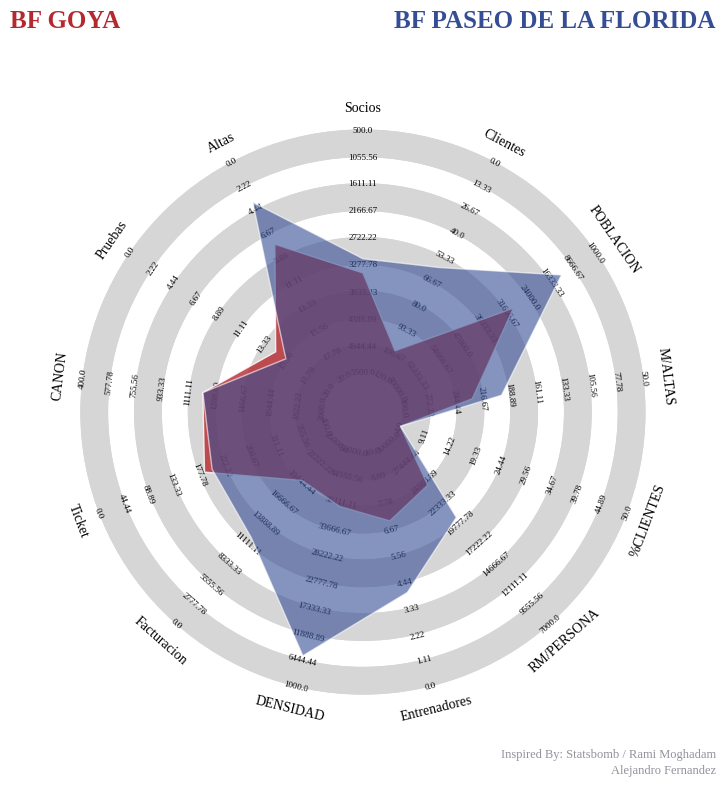

In [50]:
## GRAFICAR RADAR
params = ['Socios', 'Clientes', 'POBLACION', 'M/ALTAS', '%CLIENTES',
          'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
          'Ticket', 'CANON', 'Pruebas','Altas']

## range values
ranges = [(5500.0, 500.0), (120.0, 0.0), (70000.00,1000.0),(300.0,50.0), (4.00, 50.0), (30000.0, 7000.0), (10.0, 0.0), (50000.0, 1000.0), (25000.0, 0.0), (400.0, 0.0), (2000.0,400.0), (20.0,0.0),
          (20.0, 0.0)]

## parameter value
values = [
    [3452.0, 105.0, 29441.0, 227.0, 3.00, 24440.98, 7.0, 38267.000, 19600.58, 186.67, 1200.0, 14.5, 7.7],   ## for Goya
    [3161.0, 59.0, 12804.0, 197.0,	1.87,	20409.38,	4.0,	7310.000,	11793.80,	199.89,	1200.0,	15.5,	3.8]    ## for Paseo Florida
]

## title
title = dict(
    title_name='BF GOYA',
    title_color='#B6282F',
    subtitle_name='',
    subtitle_color='#B6282F',
    title_name_2='BF PASEO DE LA FLORIDA',
    title_color_2='#344D94',
    subtitle_name_2='',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote
endnote = "Alejandro Fernandez"

## instantiate object
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#B6282F', '#344D94'],
                                 alphas=[0.8, 0.6], title=title, endnote=endnote,
                                 compare=True)

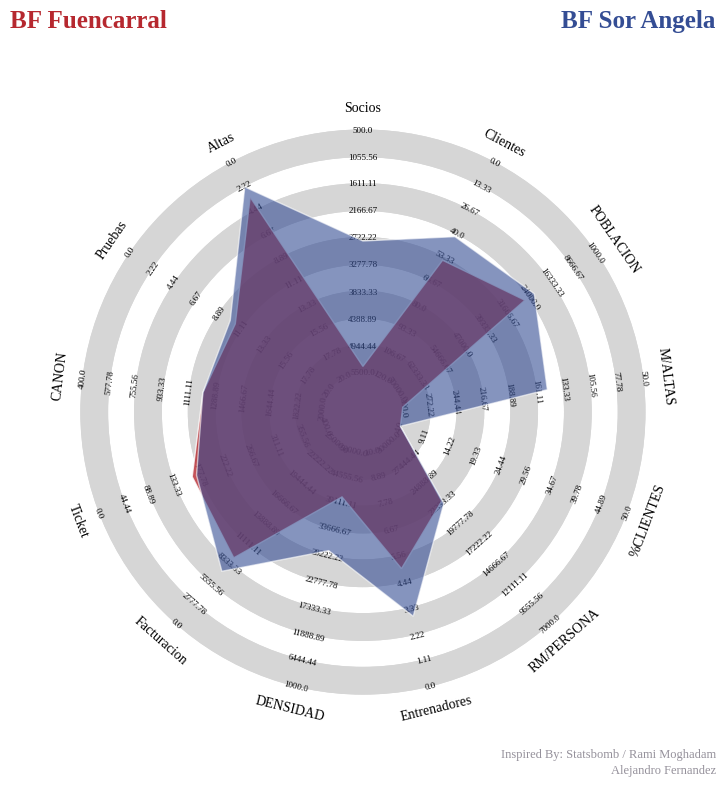

In [51]:
## GRAFICAR RADAR
params = ['Socios', 'Clientes', 'POBLACION', 'M/ALTAS', '%CLIENTES',
          'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
          'Ticket', 'CANON', 'Pruebas','Altas']

## range values
ranges = [(5500.0, 500.0), (120.0, 0.0), (70000.00,1000.0),(300.0,50.0), (4.00, 50.0), (30000.0, 7000.0), (10.0, 0.0), (50000.0, 1000.0), (25000.0, 0.0), (400.0, 0.0), (2000.0,400.0), (20.0,0.0),
          (20.0, 0.0)]

## parameter value
values = [
    [5380.0,	55.0,	25495.0,	314.0,	1.02,	22464.22,	5.0,	40237.000,	9084.60,	165.17,	1200.0,	10.5,	3.3],   ## for Fuencarral
    [2800.0,	42.0,	22282.0,	150.0,	1.50,	22169.45,	3.0,	29190.000,	7253.30,	172.70,	1200.0,	10.0,	2.3]    ## for Sor Angela
]

## title
title = dict(
    title_name='BF Fuencarral',
    title_color='#B6282F',
    subtitle_name='',
    subtitle_color='#B6282F',
    title_name_2='BF Sor Angela',
    title_color_2='#344D94',
    subtitle_name_2='',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote
endnote = "Alejandro Fernandez"

## instantiate object
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#B6282F', '#344D94'],
                                 alphas=[0.8, 0.6], title=title, endnote=endnote,
                                 compare=True)

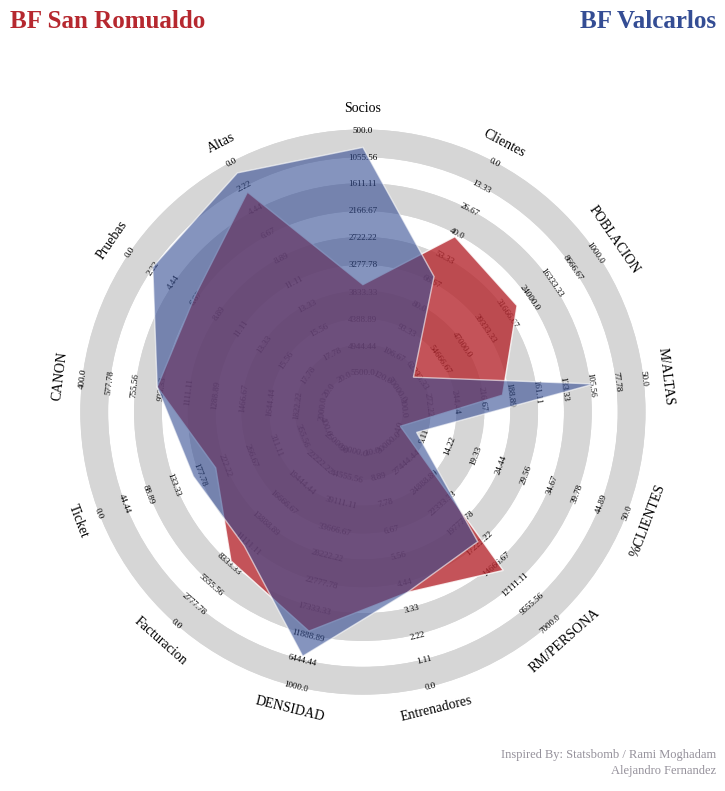

In [52]:
## GRAFICAR RADAR
params = ['Socios', 'Clientes', 'POBLACION', 'M/ALTAS', '%CLIENTES',
          'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
          'Ticket', 'CANON', 'Pruebas','Altas']

## range values
ranges = [(5500.0, 500.0), (120.0, 0.0), (70000.00,1000.0),(300.0,50.0), (4.00, 50.0), (30000.0, 7000.0), (10.0, 0.0), (50000.0, 1000.0), (25000.0, 0.0), (400.0, 0.0), (2000.0,400.0), (20.0,0.0),
          (20.0, 0.0)]

## parameter value
values = [
    [3689.0,	42.0,	28171.0,	196.0,	1.14,	13780.15,	4.0,	12637.000,	8658.20,	206.15,	900.0,	6.5,	2.8],   ## for San Romualdo
    [860.0,	64.0,	63651.0,	102.0,	7.44,	17377.61,	4.0,	7210.000,	10700.00,	167.19,	900.0,	2.2,	1.0]    ## for Valcarlos
]

## title
title = dict(
    title_name='BF San Romualdo',
    title_color='#B6282F',
    subtitle_name='',
    subtitle_color='#B6282F',
    title_name_2='BF Valcarlos',
    title_color_2='#344D94',
    subtitle_name_2='',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote
endnote = "Alejandro Fernandez"

## instantiate object
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#B6282F', '#344D94'],
                                 alphas=[0.8, 0.6], title=title, endnote=endnote,
                                 compare=True)

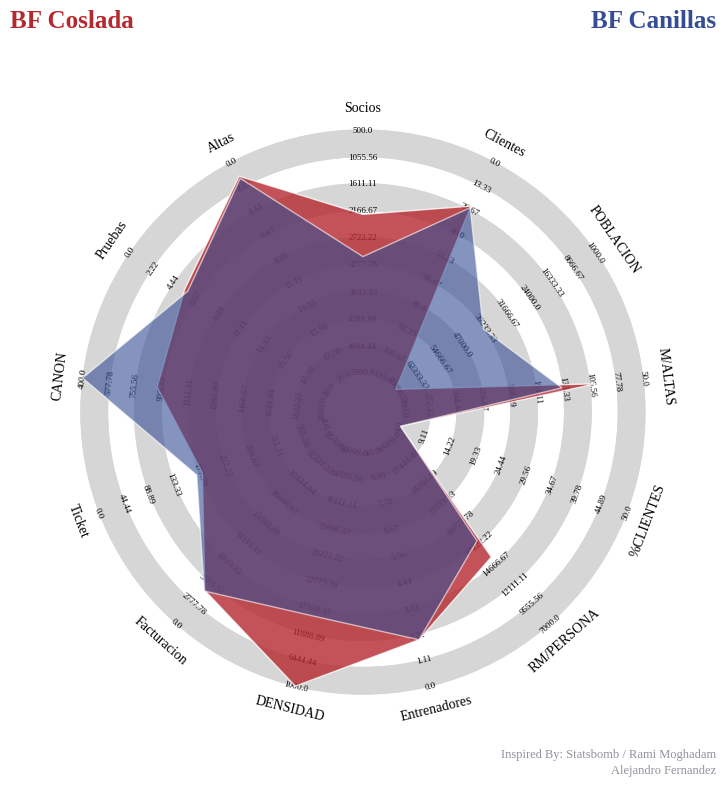

In [53]:
## GRAFICAR RADAR
params = ['Socios', 'Clientes', 'POBLACION', 'M/ALTAS', '%CLIENTES',
          'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
          'Ticket', 'CANON', 'Pruebas','Altas']

## range values
ranges = [(5500.0, 500.0), (120.0, 0.0), (70000.00,1000.0),(300.0,50.0), (4.00, 50.0), (30000.0, 7000.0), (10.0, 0.0), (50000.0, 1000.0), (25000.0, 0.0), (400.0, 0.0), (2000.0,400.0), (20.0,0.0),
          (20.0, 0.0)]

## parameter value
values = [
    [2257.0,	25.0,	81860.0,	100.0,	1.11,	15453.00,	2.0,	6.673,	4574.00,	182.96,	900.0,	5.5,	1.3],   ## for Coslada
    [3118.0,	26.0,	39708.0,	135.0,	0.83,	17487.34,	2.0,	15772.0,	4500.20,	173.08,	400.0,	5.8,	1.5]    ## for Canillas
]

## title
title = dict(
    title_name='BF Coslada',
    title_color='#B6282F',
    subtitle_name='',
    subtitle_color='#B6282F',
    title_name_2='BF Canillas',
    title_color_2='#344D94',
    subtitle_name_2='',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote
endnote = "Alejandro Fernandez"

## instantiate object
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#B6282F', '#344D94'],
                                 alphas=[0.8, 0.6], title=title, endnote=endnote,
                                 compare=True)

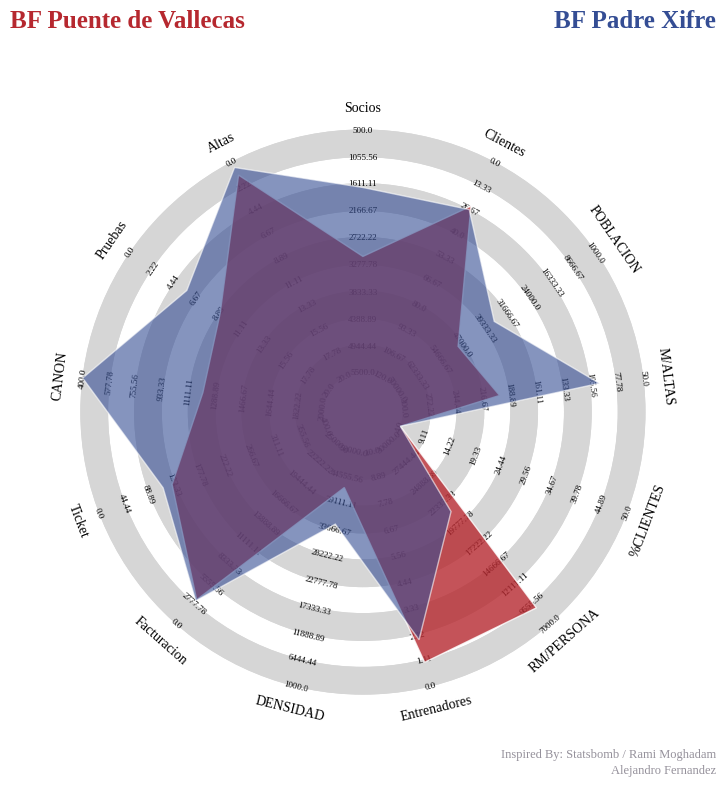

In [54]:
## GRAFICAR RADAR
params = ['Socios', 'Clientes', 'POBLACION', 'M/ALTAS', '%CLIENTES',
          'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
          'Ticket', 'CANON', 'Pruebas','Altas']

## range values
ranges = [(5500.0, 500.0), (120.0, 0.0), (70000.00,1000.0),(300.0,50.0), (4.00, 50.0), (30000.0, 7000.0), (10.0, 0.0), (50000.0, 1000.0), (25000.0, 0.0), (400.0, 0.0), (2000.0,400.0), (20.0,0.0),
          (20.0, 0.0)]

## parameter value
values = [
    [3114.0,	25.0,	48305.0,	199.0,	0.80,	8940.56,	1.0,	42157.0,	3251.50,	130.06,	1200.0,	9.0,	1.2],   ## for Puente de Vallecas
    [1710.0,	27.0,	35963.0,	96.0,	1.60,	21152.62,	2.0,	34638.0,	3092.0,	114.52,	400.0,	5.7,	0.5]    ## for Padre Xifre
]

## title
title = dict(
    title_name='BF Puente de Vallecas',
    title_color='#B6282F',
    subtitle_name='',
    subtitle_color='#B6282F',
    title_name_2='BF Padre Xifre',
    title_color_2='#344D94',
    subtitle_name_2='',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote
endnote = "Alejandro Fernandez"

## instantiate object
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#B6282F', '#344D94'],
                                 alphas=[0.8, 0.6], title=title, endnote=endnote,
                                 compare=True)

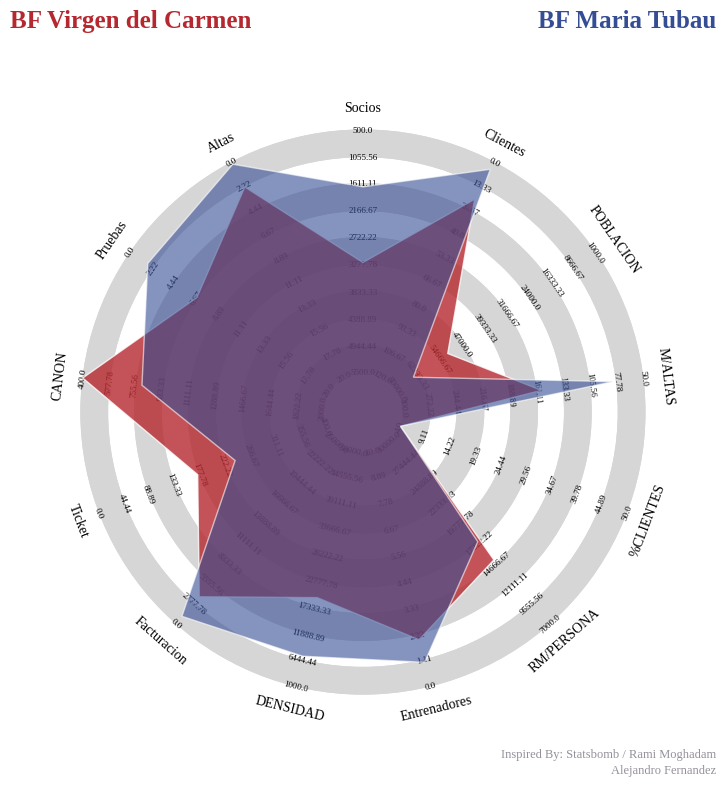

In [55]:
## GRAFICAR RADAR
params = ['Socios', 'Clientes', 'POBLACION', 'M/ALTAS', '%CLIENTES',
          'RM/PERSONA', 'Entrenadores', 'DENSIDAD', 'Facturacion',
          'Ticket', 'CANON', 'Pruebas','Altas']

## range values
ranges = [(5500.0, 500.0), (120.0, 0.0), (70000.00,1000.0),(300.0,50.0), (4.00, 50.0), (30000.0, 7000.0), (10.0, 0.0), (50000.0, 1000.0), (25000.0, 0.0), (400.0, 0.0), (2000.0,400.0), (20.0,0.0),
          (20.0, 0.0)]

## parameter value
values = [
    [3237.0,	21.0,	51842.0,	156.0,	0.65,	15095.35,	2.0,	19525.0,	3670.0,	174.76,	400.0,	6.7,	2.3],   ## for Virgen del Carmen
    [1697.0,	4.0,	63651.0,	81.0,	0.24,	17377.61,	1.0,	7210.0,	960.0,	240.0,	800.0,	1.7, 0.2	]    ## for Maria Tubau
]

## title
title = dict(
    title_name='BF Virgen del Carmen',
    title_color='#B6282F',
    subtitle_name='',
    subtitle_color='#B6282F',
    title_name_2='BF Maria Tubau',
    title_color_2='#344D94',
    subtitle_name_2='',
    subtitle_color_2='#344D94',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote
endnote = "Alejandro Fernandez"

## instantiate object
radar = Radar()

## plot radar -- alphas
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#B6282F', '#344D94'],
                                 alphas=[0.8, 0.6], title=title, endnote=endnote,
                                 compare=True)